# RQ 2.3: Lexical Analysis
In this research subquestion, we aim to analyze the lexical properties of the toxic words highlighted in the previous step. We will achieve this by performing the following steps:
1. Load the highlighted toxic words from the file.
2. Process the words with SpaCy to extract POS tags.
3. Calculate the distribution of POS tags.
4. Visualize the POS tag distribution with a pie chart using Matplotlib.
5. Extract lemmas (base forms) of the words and calculate their frequencies.
6. Filter the lemmas with more than 2 occurrences. This was done because it is not feasible to visualize all, even the ones with a single occurrence.
7. Visualize the filtered lemma frequencies with a bar chart using Matplotlib.

In [1]:
import re

file_path = "highlighted_toxic_words_v2.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

words = re.findall(r'\b\w+\b', content)

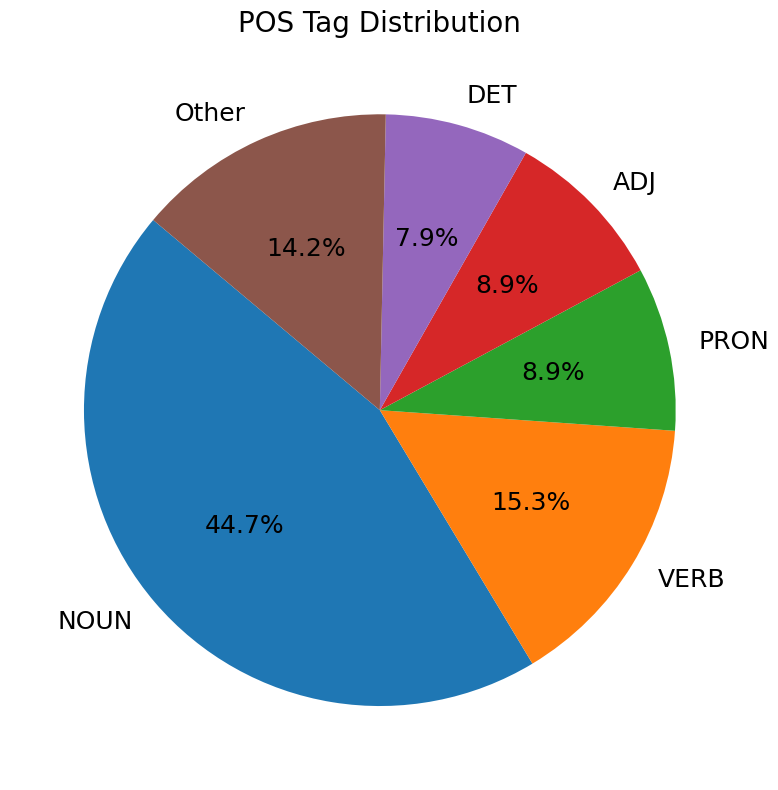

In [2]:
import spacy
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process words with SpaCy
doc = nlp(" ".join(words))

# We'll rebuild pos_counts by manually overriding PROPN tags for certain words
pos_counts = Counter()
pos_words = defaultdict(list)

for token in doc:
    # Convert token to lowercase for matching in the offensive_words set
    token_lower = token.text.lower()
    
    # If it's PROPN but is in our offensive list, override to NOUN
    if token.pos_ == "PROPN" and token_lower in words:
        new_pos = "NOUN"
    else:
        new_pos = token.pos_
    
    pos_counts[new_pos] += 1
    pos_words[new_pos].append(token.text)

# # Now we have updated pos_counts and pos_words
# print("Words grouped by POS tags (with overrides):")
# for pos, wds in pos_words.items():
#     print(f"{pos}: {wds}")

# Sort categories from largest to smallest
total_count = sum(pos_counts.values())
pos_sorted = sorted(pos_counts.items(), key=lambda x: x[1], reverse=True)

# Merge categories with <5% into 'Other'
new_labels = []
new_counts = []
others_count = 0

for label, count in pos_sorted:
    percentage = (count / total_count) * 100
    if percentage < 5:
        others_count += count
    else:
        new_labels.append(label)
        new_counts.append(count)

# If we accumulated any 'Other' counts, add them as a slice
if others_count > 0:
    new_labels.append("Other")
    new_counts.append(others_count)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    new_counts,
    labels=new_labels,
    autopct='%1.1f%%',
    startangle=140,                      # Optional: rotate start angle
    textprops={'fontsize': 18}           # Enlarge label font size
)
plt.title("POS Tag Distribution", fontsize=20)
plt.tight_layout()
plt.show()

Base forms (lemmas) with more than 5 counts:
fuck: 26
ľ: 6
shit: 6
you: 6
ck: 4
ick: 4
dick: 4
off: 4
t: 3
f: 3
the: 3
a: 3
kill: 3
this: 3
ass: 3
my: 3
mother: 2
that: 2
dam: 2
n: 2
kick: 2
his: 2
bitch: 2
pig: 2
so: 2


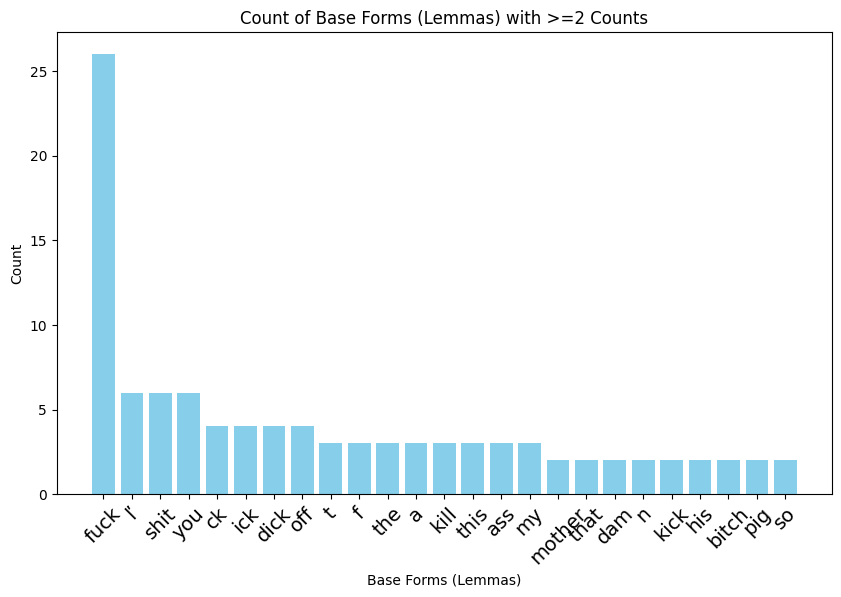

: 

In [8]:
# Extract lemmas (base forms) and calculate frequencies
# Extract lemmas (base forms) and calculate frequencies
lemmas = []
for token in doc:
    # Check if the token text is "fucking" and adjust the lemma manually
    if token.text == "fucking":
        lemmas.append("fuck")  # Force "fucking" to be counted as "fuck"
    else:
        lemmas.append(token.lemma_)  # Use the normal lemma otherwise

lemma_counts = Counter(lemmas)

# Filter lemmas with more than 5 occurrences
filtered_lemmas = {lemma: count for lemma, count in sorted(lemma_counts.items(), key=lambda x: x[1], reverse=True) if count >= 2}

# Print filtered lemmas
print("Base forms (lemmas) with more than 5 counts:")
for lemma, count in filtered_lemmas.items():
    print(f"{lemma}: {count}")

# Bar chart for filtered lemma frequencies
plt.figure(figsize=(10, 6))
plt.bar(filtered_lemmas.keys(), filtered_lemmas.values(), color='skyblue')
plt.xlabel("Base Forms (Lemmas)")
plt.ylabel("Count")
plt.title("Count of Base Forms (Lemmas) with >=2 Counts")
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [6]:
top_5_array = []
# Print the top 10 most common words for each POS tag
for pos, wds in pos_words.items():
    # Count the frequency of each word
    freq_counter = Counter(wds)
    # Extract the top 5 most common words
    top_5 = freq_counter.most_common(5)
    top_5_array.append((pos, top_5))

# POS tags we are interested in
tags_of_interest = {'NOUN', 'VERB', 'ADJ'}

# Use a set to avoid duplicates
unique_words = set()

for pos_tag, word_counts in top_5_array:
    if pos_tag in tags_of_interest:
        for word, count in word_counts:
            unique_words.add(word)

for lemma, count in filtered_lemmas.items():
    if count > 6:
        unique_words.add(lemma)

all_words_list = list(unique_words)
print(all_words_list)
print(len(all_words_list))


['shut', 'fucked', 'bunch', 'red', 'fuck', 'black', 'kill', 'beat', 'shit', 't', 'fucking', 'icks', 'dick', 'white', 'ck']
15
